In [9]:
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np
import glob
import time
import cv2
import os

In [2]:
! gdown https://drive.google.com/u/3/uc?id=1R-Wp7HhRuQ7JVmTSwY1ZsUI7EwXtHzav

Downloading...
From: https://drive.google.com/u/3/uc?id=1R-Wp7HhRuQ7JVmTSwY1ZsUI7EwXtHzav
To: /content/PBC_dataset_normal_DIB.zip
281MB [00:03, 70.6MB/s]


In [3]:
! unzip -qq PBC_dataset_normal_DIB.zip

In [10]:
dir = glob.glob('PBC_dataset_normal_DIB/*')
get_freq = {}
# count = 1
for item in dir:
  freq = len(glob.glob("{}/*".format(item)))
  print(freq)
  item_name  = item.split('/')[1]
  get_freq[item_name] = freq
  #get_freq[count] = freq
  #count += 1
  #get_freq.append(freq)


1214
1218
3117
2895
2348
1551
1420
3329


In [11]:
get_freq

{'basophil': 1218,
 'eosinophil': 3117,
 'erythroblast': 1551,
 'ig': 2895,
 'lymphocyte': 1214,
 'monocyte': 1420,
 'neutrophil': 3329,
 'platelet': 2348}

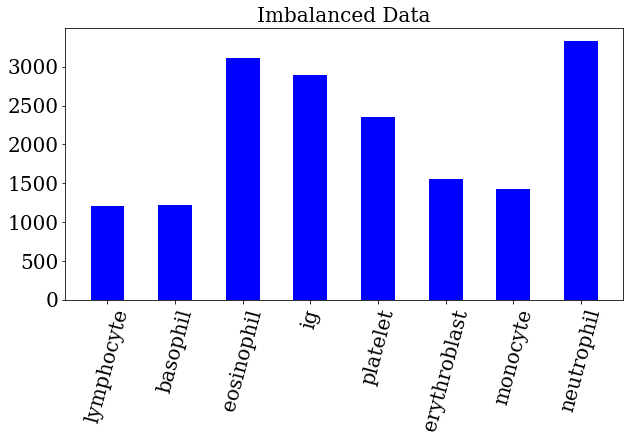

In [12]:
width = 0.5
plt.figure(figsize=(10,5))
plt.title('Imbalanced Data', fontsize=20, fontname = 'DejaVu Serif', fontweight = 500)
plt.xticks(rotation=75, fontsize=15, fontname = 'DejaVu Serif', fontweight = 500)
plt.yticks(fontsize=15, fontname = 'DejaVu Serif', fontweight = 500)
plt.bar([item for item in get_freq], [get_freq[item] for item in get_freq], width, color='b')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('data_plot.eps',bbox_inches='tight')
plt.savefig('data_plot.png',bbox_inches='tight')
plt.show()

In [13]:
short_index = {}
total_img_names = []
short_labels = []
for item in dir:
  img_names = glob.glob("{}/*".format(item))[:5]
  short_name = str(img_names[0].split('.')[0]).split('/')[2].split('_')[0]
  short_index[short_name] = img_names[0].split('/')[1]
  short_labels.append(short_name)
  total_img_names.append(img_names)
print(total_img_names)
print(len(total_img_names))
print(short_labels)
print(short_index)

[['PBC_dataset_normal_DIB/lymphocyte/LY_384608.jpg', 'PBC_dataset_normal_DIB/lymphocyte/LY_64544.jpg', 'PBC_dataset_normal_DIB/lymphocyte/LY_128386.jpg', 'PBC_dataset_normal_DIB/lymphocyte/LY_178247.jpg', 'PBC_dataset_normal_DIB/lymphocyte/LY_418697.jpg'], ['PBC_dataset_normal_DIB/basophil/BA_318538.jpg', 'PBC_dataset_normal_DIB/basophil/BA_603889.jpg', 'PBC_dataset_normal_DIB/basophil/BA_178345.jpg', 'PBC_dataset_normal_DIB/basophil/BA_658350.jpg', 'PBC_dataset_normal_DIB/basophil/BA_60739.jpg'], ['PBC_dataset_normal_DIB/eosinophil/EO_157965.jpg', 'PBC_dataset_normal_DIB/eosinophil/EO_358594.jpg', 'PBC_dataset_normal_DIB/eosinophil/EO_103957.jpg', 'PBC_dataset_normal_DIB/eosinophil/EO_783136.jpg', 'PBC_dataset_normal_DIB/eosinophil/EO_317781.jpg'], ['PBC_dataset_normal_DIB/ig/MMY_803454.jpg', 'PBC_dataset_normal_DIB/ig/MMY_523610.jpg', 'PBC_dataset_normal_DIB/ig/MMY_943233.jpg', 'PBC_dataset_normal_DIB/ig/MMY_241098.jpg', 'PBC_dataset_normal_DIB/ig/PMY_249820.jpg'], ['PBC_dataset_norm

In [14]:
short_rev_index = {}
for item in short_index:
  short_rev_index[short_index[item]] = item
print(short_rev_index)

{'lymphocyte': 'LY', 'basophil': 'BA', 'eosinophil': 'EO', 'ig': 'MMY', 'platelet': 'PLATELET', 'erythroblast': 'ERB', 'monocyte': 'MO', 'neutrophil': 'SNE'}


5

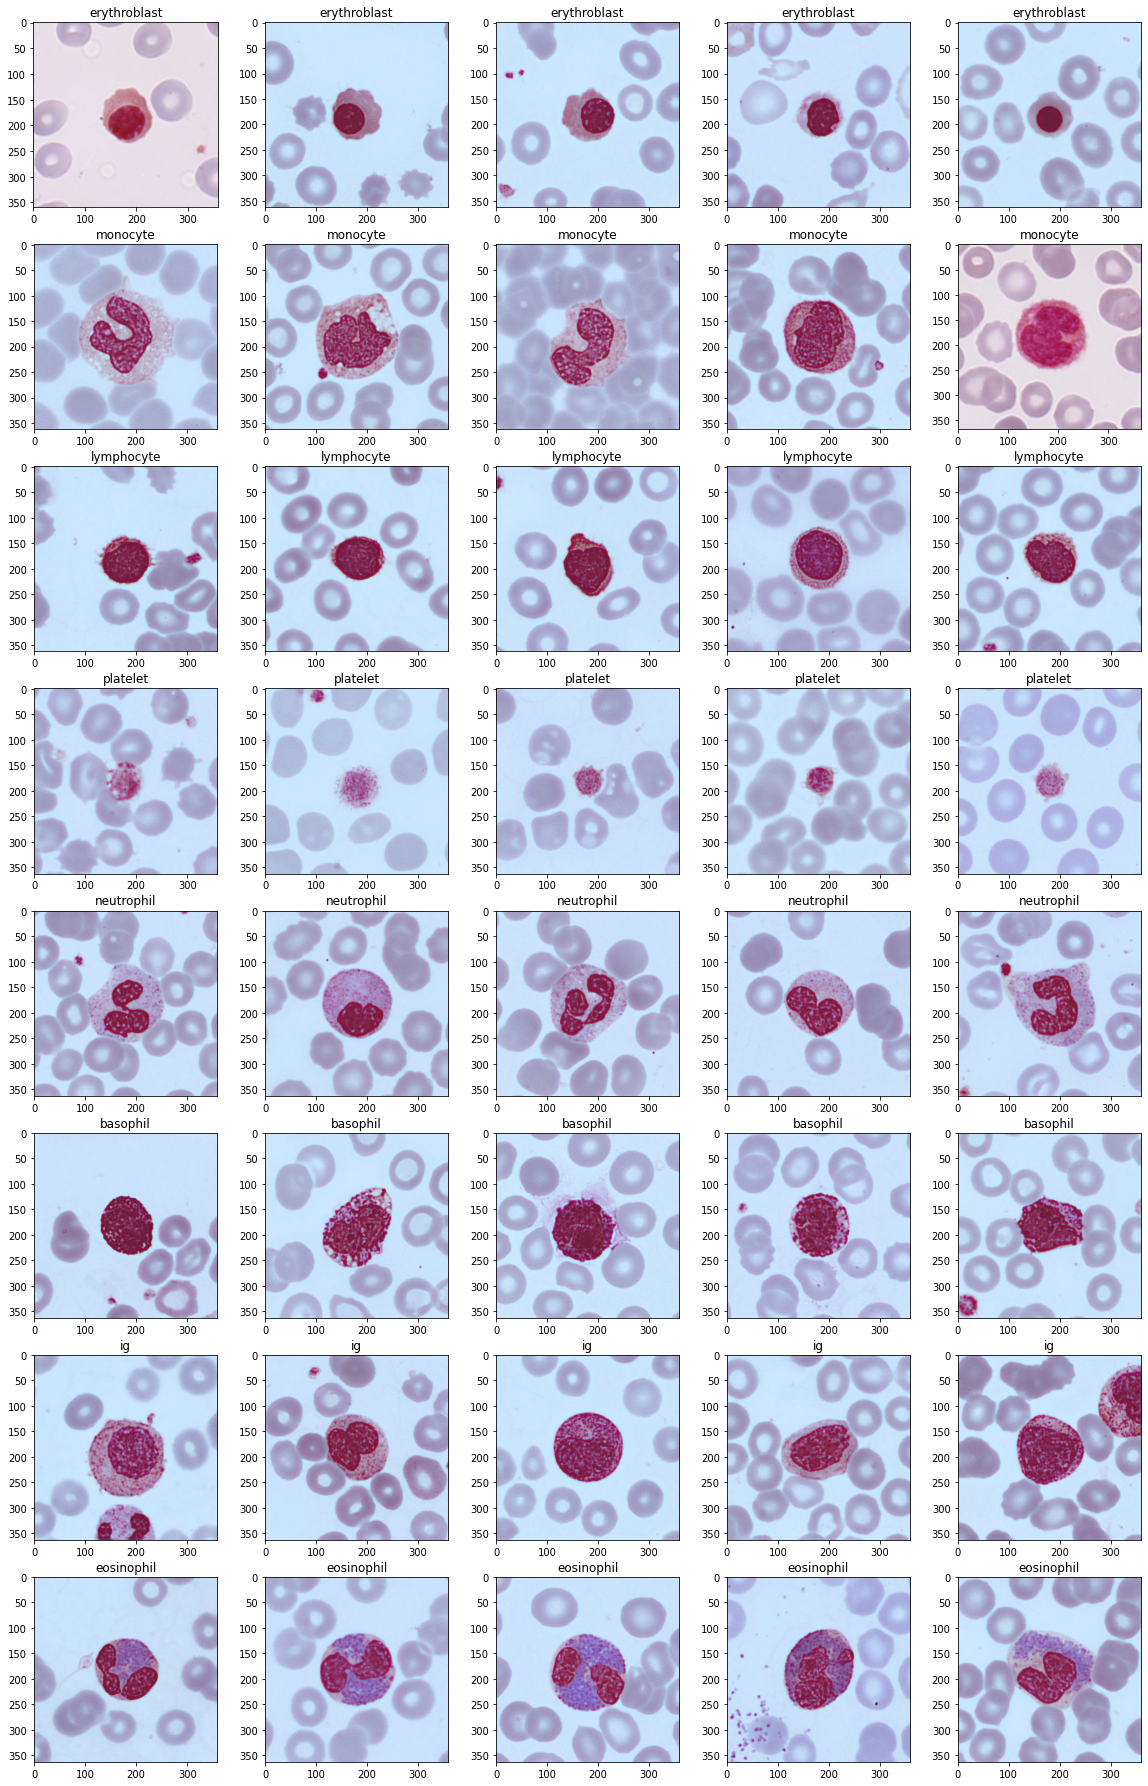

In [ ]:
fig, axs = plt.subplots(8, 5, figsize=(5*4,8*4))

for i in range(8):
  for j in range(5):
    im = cv2.imread(total_img_names[i][j],cv2.IMREAD_UNCHANGED)
    axs[i, j].imshow(im)
    axs[i, j].title.set_text(total_img_names[i][j].split('/')[1])
plt.show()

PBC_dataset_normal_DIB/lymphocyte/LY_384608.jpg


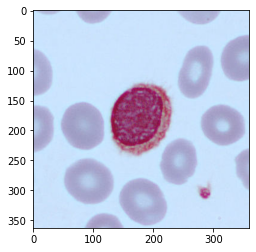

shape =  (363, 360, 3)


In [15]:
print(total_img_names[0][0])
im = cv2.imread(total_img_names[0][0],cv2.IMREAD_UNCHANGED)
plt.imshow(im)
plt.show()
print("shape = ", im.shape)

In [16]:
get_freq

{'basophil': 1218,
 'eosinophil': 3117,
 'erythroblast': 1551,
 'ig': 2895,
 'lymphocyte': 1214,
 'monocyte': 1420,
 'neutrophil': 3329,
 'platelet': 2348}

In [17]:
index = {}
rev_index = {}
count = 0
for item in get_freq:
  index[item] = count
  rev_index[count] = item
  count += 1 
print(index)
print(rev_index)

{'lymphocyte': 0, 'basophil': 1, 'eosinophil': 2, 'ig': 3, 'platelet': 4, 'erythroblast': 5, 'monocyte': 6, 'neutrophil': 7}
{0: 'lymphocyte', 1: 'basophil', 2: 'eosinophil', 3: 'ig', 4: 'platelet', 5: 'erythroblast', 6: 'monocyte', 7: 'neutrophil'}


In [18]:
def parse_filepath(filepath):
    try:
        #path, filename = os.path.split(filepath)
        label = filepath.split('/')[1]
        #filename, ext = os.path.splitext(filename)
        #label, _ = filename.split("_")
        return label
    except Exception as e:
        print('error to parse %s. %s' % (filepath, e))
        return None, None

In [19]:
DATA_DIR = 'PBC_dataset_normal_DIB'  # 302410 images. validate accuracy: 98.8%
H, W, C = 360, 360, 3
N_LABELS = len(index)
D = 1

In [20]:
files = glob.glob("{}/*/*.jpg".format(DATA_DIR))
print("Total files = ",len(files))

Total files =  17092


In [21]:
# create a pandas data frame of images, age, gender and race
attributes = list(map(parse_filepath, files))

df = pd.DataFrame(attributes)
df['file'] = files
df.columns = ['label', 'file']
df = df.dropna()
df.head()

label                                             file
0  lymphocyte  PBC_dataset_normal_DIB/lymphocyte/LY_384608.jpg
1  lymphocyte   PBC_dataset_normal_DIB/lymphocyte/LY_64544.jpg
2  lymphocyte  PBC_dataset_normal_DIB/lymphocyte/LY_128386.jpg
3  lymphocyte  PBC_dataset_normal_DIB/lymphocyte/LY_178247.jpg
4  lymphocyte  PBC_dataset_normal_DIB/lymphocyte/LY_418697.jpg

In [22]:
p = np.random.permutation(len(df))
train_up_to = int(len(df) * 0.95)
train_idx = p[:train_up_to]
test_idx = p[train_up_to:]

# split train_idx further into training and validation set
train_up_to = int(train_up_to * 0.95)
train_idx, valid_idx = train_idx[:train_up_to], train_idx[train_up_to:]

print('train count: %s, valid count: %s, test count: %s' % (
    len(train_idx), len(valid_idx), len(test_idx)))

train count: 15425, valid count: 812, test count: 855


In [23]:
train_idx[:10]

array([  628,  4596, 15182,  2955, 13142,  1508,   680, 16813,  6034,
        1835])

In [24]:
valid_idx[:10]

array([15612,  2463,   182,  8726, 15202,  4824,  7158,  8259, 15782,
        5169])

In [25]:
test_idx[:10]

array([ 7529, 14371,  9050, 14362, 13095,  5390,  5228,  9563,  3589,
       14639])

In [98]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Conv2D, MaxPool2D, GlobalMaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model

input_layer = tf.keras.Input(shape=(H, W, C))
x = tf.keras.layers.Conv2D(32, 3, activation='relu', strides=(2, 2))(input_layer)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', strides=(2, 2))(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
#x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', strides=(2, 2))(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
#x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(N_LABELS, activation='softmax')(x)
x = tf.keras.layers.Reshape((1, N_LABELS))(x)

model = tf.keras.models.Model(inputs=input_layer, outputs=x)

model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics= ['accuracy'])
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 360, 360, 3)]     0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 179, 179, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 64)          0   

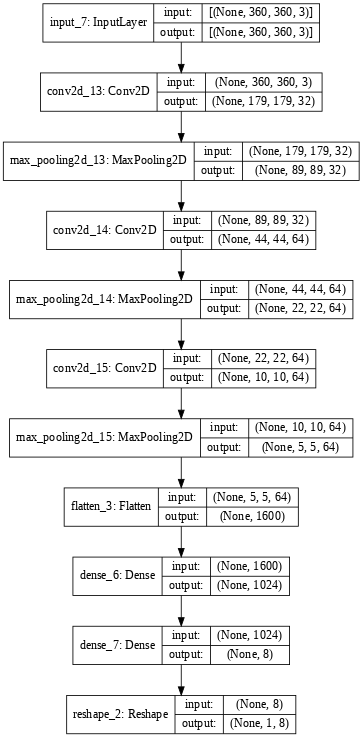

In [99]:
from tensorflow.keras.utils import  plot_model as pm  #plotting the model structure
pm(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True,dpi=60)

In [100]:
from tensorflow.keras.utils import to_categorical
from PIL import Image

def get_data_generator(df, indices, for_training, batch_size=16):
    images, labels = [], []
    while True:
        #print("indices = ",indices)    
        #print("len indices = ",len(indices))
        for i in indices:

            r = df.iloc[i]
            #print(" r = ", r, " i = ",i)
            file, label = r['file'], r['label']
            #print("file, label = ",file, label)
            im = Image.open(file)
            im = im.resize((360, 360))
            im = np.array(im) / 255.0
            #print(im.shape)
            images.append(im)
            #print(np.asarray([to_categorical(index[label], N_LABELS)]))
            #print(np.asarray([to_categorical(index[label], N_LABELS)]).shape)
            labels.append(np.array([to_categorical(index[label], N_LABELS)]))
            if len(images) >= batch_size:
                yield np.array(images), np.array(labels)
                images, labels = [], []
        if not for_training:
            break


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras
# batch_size = 100
# valid_batch_size = 32
batch_size = 40
valid_batch_size = 40
train_gen = get_data_generator(df, train_idx, for_training=True, batch_size=batch_size)
valid_gen = get_data_generator(df, valid_idx, for_training=True, batch_size=valid_batch_size)

callbacks = [
    ModelCheckpoint("./model_checkpoint", monitor='val_loss')
]
# for storing logs into tensorboard
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

history = model.fit(train_gen,
                    steps_per_epoch=len(train_idx)//batch_size,
                    epochs=20,
                    callbacks=[tensorboard_callback,callbacks],
                    validation_data=valid_gen,
                    validation_steps=len(valid_idx)//valid_batch_size)

Epoch 1/20
385/385 [==============================] - 98s 255ms/step - loss: 0.7236 - accuracy: 0.7289 - val_loss: 0.4341 - val_accuracy: 0.8363
INFO:tensorflow:Assets written to: ./model_checkpoint/assets
Epoch 2/20
385/385 [==============================] - 95s 247ms/step - loss: 0.3280 - accuracy: 0.8820 - val_loss: 0.2959 - val_accuracy: 0.8963
INFO:tensorflow:Assets written to: ./model_checkpoint/assets
Epoch 3/20
385/385 [==============================] - 95s 248ms/step - loss: 0.2349 - accuracy: 0.9164 - val_loss: 0.2965 - val_accuracy: 0.8838
INFO:tensorflow:Assets written to: ./model_checkpoint/assets
Epoch 4/20
385/385 [==============================] - 95s 247ms/step - loss: 0.1928 - accuracy: 0.9318 - val_loss: 0.2491 - val_accuracy: 0.9075
INFO:tensorflow:Assets written to: ./model_checkpoint/assets
Epoch 5/20
385/385 [==============================] - 96s 250ms/step - loss: 0.1677 - accuracy: 0.9411 - val_loss: 0.1953 - val_accuracy: 0.9312
INFO:tensorflow:Assets written 

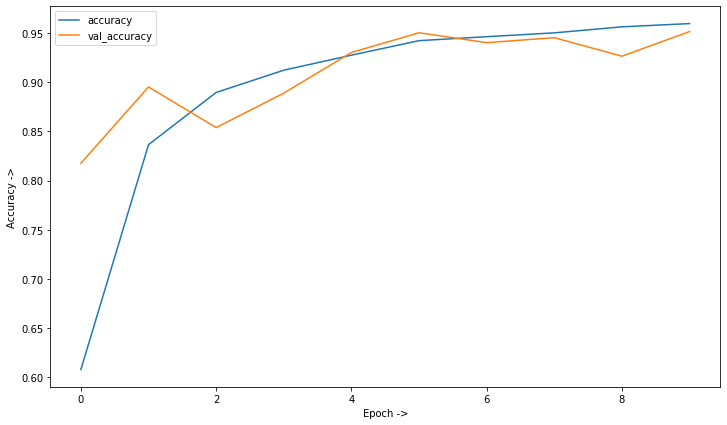

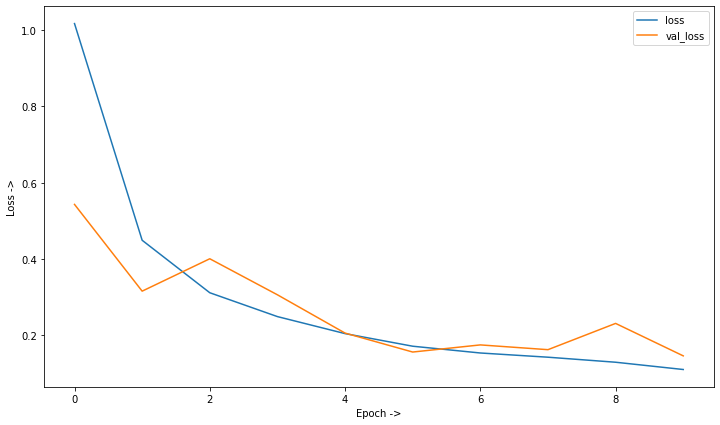

In [79]:
plt.figure(figsize=(12,7))
legend_acc = []
for item in history.history.keys():
  if item.split('_')[-1:] == ['accuracy']:
    #print("Accuracy = ",item)
    legend_acc.append(item)
    plt.plot(history.history[item])
plt.ylabel('Accuracy ->')
plt.xlabel('Epoch ->')
plt.legend(legend_acc, loc='upper left')
plt.show()

plt.figure(figsize=(12,7))
legend_acc = []
for item in history.history.keys():
  if item.split('_')[-1:] == ['loss']:
    #print("Accuracy = ",item)
    legend_acc.append(item)
    plt.plot(history.history[item])
plt.ylabel('Loss ->')
plt.xlabel('Epoch ->')
plt.legend(legend_acc, loc='upper right')
plt.show()

In [80]:
# download the model in computer for later use
model.save('classification_blood.h5')

In [81]:
test_gen = get_data_generator(df, test_idx, for_training=False, batch_size=128)
dict(zip(model.metrics_names, model.evaluate(test_gen, steps=len(test_idx)//128)))

6/6 [==============================] - 5s 943ms/step - loss: 0.1359 - accuracy: 0.9570


{'accuracy': 0.95703125, 'loss': 0.13590256869792938}

In [82]:
test_gen = get_data_generator(df, test_idx, for_training=False, batch_size=128)
x_test, y_test = next(test_gen)

y_pred = model.predict_on_batch(x_test)

y_true = tf.math.argmax(y_test, axis=-1)
y_pred = tf.math.argmax(y_pred, axis=-1)

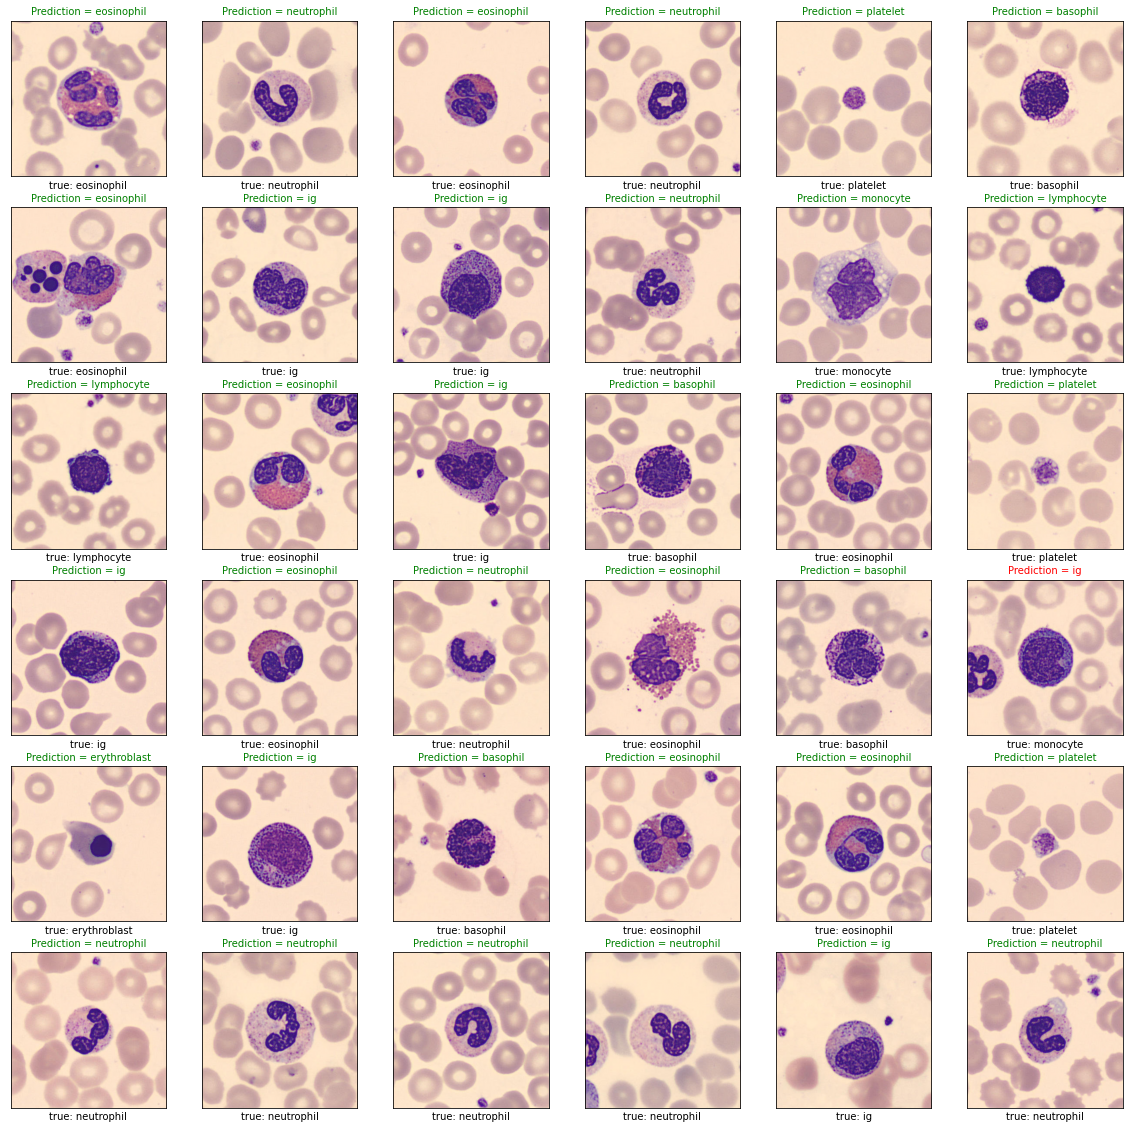

In [97]:
import math
n = 36
random_indices = np.random.permutation(n)
n_cols = 6
n_rows = math.ceil(n / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
for i, img_idx in enumerate(random_indices):
    ax = axes.flat[i]
    img_ = x_test[img_idx].copy()
    #print(img_.shape)
    #img_1 = cv2.resize(img_, (20,20), interpolation = cv2.INTER_AREA) 
    ax.imshow(img_)
    #print(y_pred[img_idx])
    actual_pred = ""
    true_val = ""
    for ten in y_pred[img_idx]:
      #print(int(ten))
      actual_pred += rev_index[int(ten)]
    for ten in y_true[img_idx]:
      true_val += rev_index[int(ten)]
    if actual_pred == true_val:
        ax.set_title("Prediction = {}".format(actual_pred),fontsize=10).set_color('green')
    else:
        ax.set_title("Prediction = {}".format(actual_pred),fontsize=10).set_color('red')
    ax.set_xlabel('true: {}'.format(true_val),fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])